# 파이프라인
- 다음주에 시험 있으니 잘 준비할것!!
- 손코딩 위주가 될 것이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 준비

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## 훈련 데이터 세트와 테스트 데이터 세트로 분리
- 시험에 나오니깐 손코딩 할 수 있을 정도로 외워버리자.

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 독립변수, 테스트 독립변수, 훈련 종속변수, 테스트 종속변수가 순서대로
train_input, test_input, train_target, test_target = train_test_split(
    # 전체 데이터의 종속변수, 전체 데이터의 독립변수
    perch_length, perch_weight, random_state = 42
    )

# 1차원 데이터지만 2차원 데이터로 눈속임
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

## 모델 만들기


In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

- 잘 예측된듯 하다.

In [11]:
print(knr.predict([[50]]))

[1033.33333333]


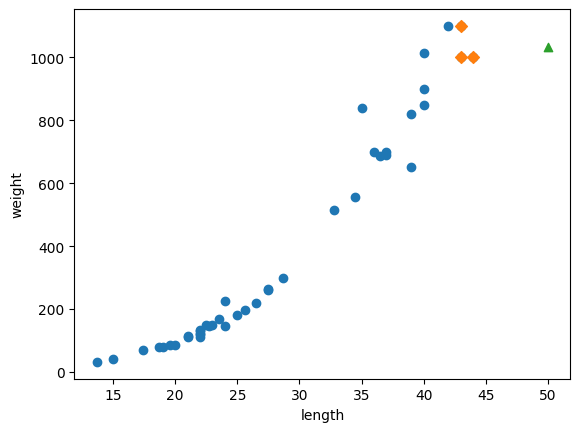

In [18]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(knr.predict([[5000]]))

[1033.33333333]


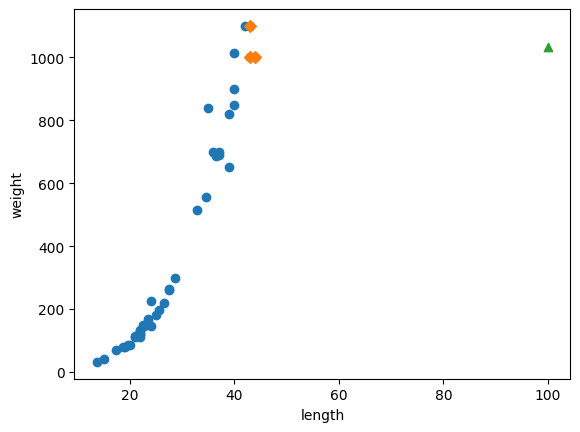

In [27]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [30]:
lr.predict([[100]])

array([3192.69585141])

In [31]:
lr.predict([[5000]])

array([194376.7061732])

In [37]:
# 기울기와 절편 출력

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


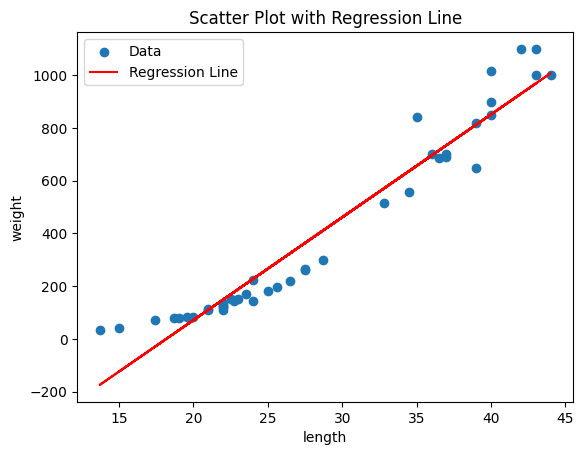

In [42]:
import matplotlib.pyplot as plt

# 선형 회귀 모델 예측값
y_pred = lr.predict(train_input)

# 산점도 그리기
plt.scatter(train_input, train_target, label='Data')

# 회귀선 그리기
plt.plot(train_input, y_pred, color='red', label='Regression Line')

# 예측 점 그리기
#plt.scatter(100, 3192.69, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

In [38]:
lr.score(train_input, train_target)

0.939846333997604

In [39]:
lr.score(test_input, test_target)

0.8247503123313558

## 모델의 맹점

- y는 몸무게라서 항상 0 이상이어야 하는데 음수 값이 측정된다?

- 길이가 0 이상일때 음수가 측정되는 경우가 있다.
- 해결방안 => 1차함수를 2차함수로 만들어줘야 한다!

In [40]:
lr.predict([[15]])

array([-123.7614705])

# 다항회귀화
- $y = a*x^2 + a*x + c$

In [45]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_input.shape, train_poly.shape, train_input[0] ,train_poly[0])

(42, 1) (42, 2) [19.6] [384.16  19.6 ]


In [51]:
lr = LinearRegression()

# 타겟값은 변하지 않는다.
lr.fit(train_poly, train_target)

LinearRegression()

In [50]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


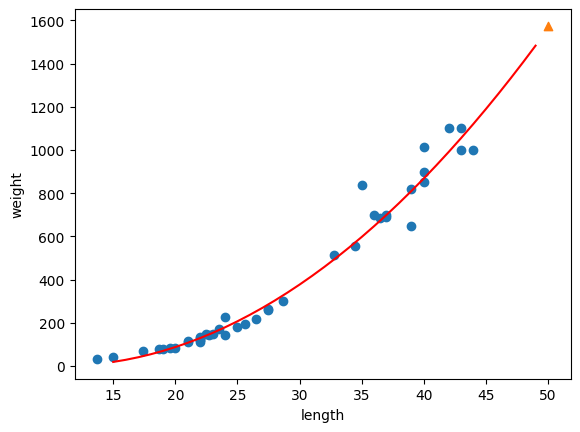

In [54]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, color='red')

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [56]:
lr.predict([[15*15, 15]])

array([20.90606071])

In [57]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 데이터 불러오기


In [61]:
import pandas as pd
import numpy as np

wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/wine.csv')
wine.head()

# class가 0이면 red, 1이면 white 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [63]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

- 테스트 셋 분리

In [65]:
from sklearn.model_selection import train_test_split

train_input,test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42
)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 엔지니어링
- 피처 스케일링
- 트리엔 적용 안 해도 됨
- 선형엔 무조건 적용

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [70]:
train_input[0], train_scaled[0]

(array([10.5 ,  7.7 ,  3.19]), array([ 0.01376574,  0.4646116 , -0.16888369]))

## 로지스틱 회귀

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [73]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


- 문제점: 해석이 매우 어렵다.

# 결정 트리 모델
- 해석이 훨씬 쉽다

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


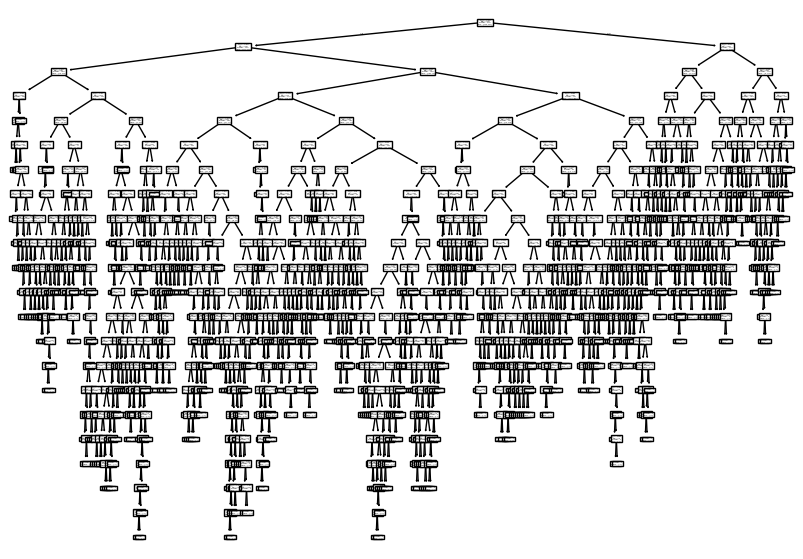

In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

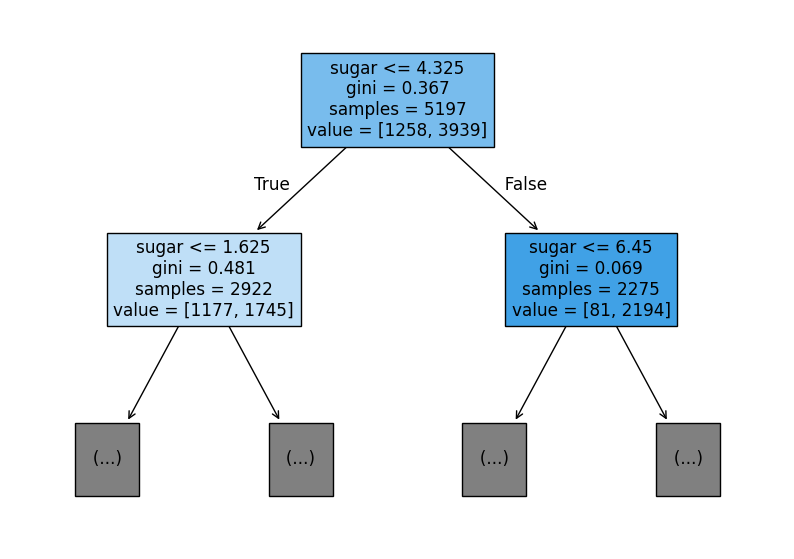

In [78]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- Scaled 되지 않은 데이터 기준으로 만들어보기

In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


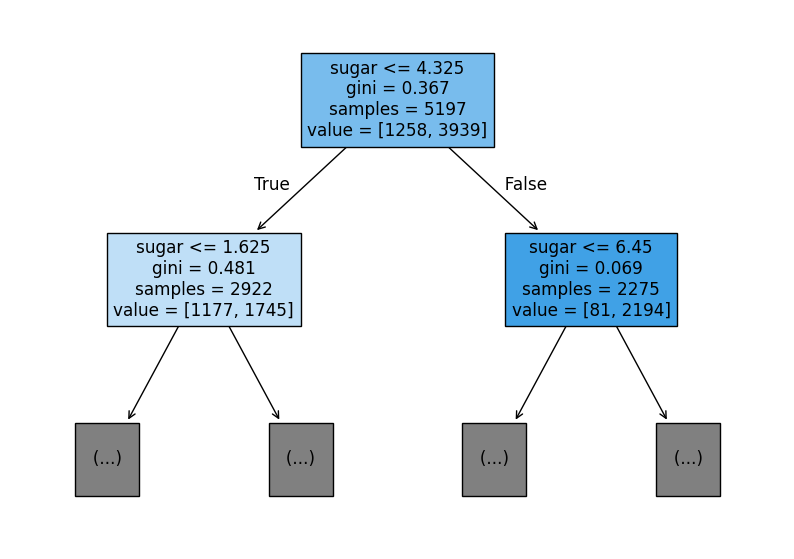

In [80]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 해석
- 불순도가 높다 -> 분류 잘 안됨 -> 지니계수 높음
- 불순도가 낮다 -> 분류 잘 되는중 -> 지니 계수 낮음

## 하이퍼 파라미터 튜닝
- 트리 모델의 경우 가지치기

0.8895516644217818
0.8630769230769231


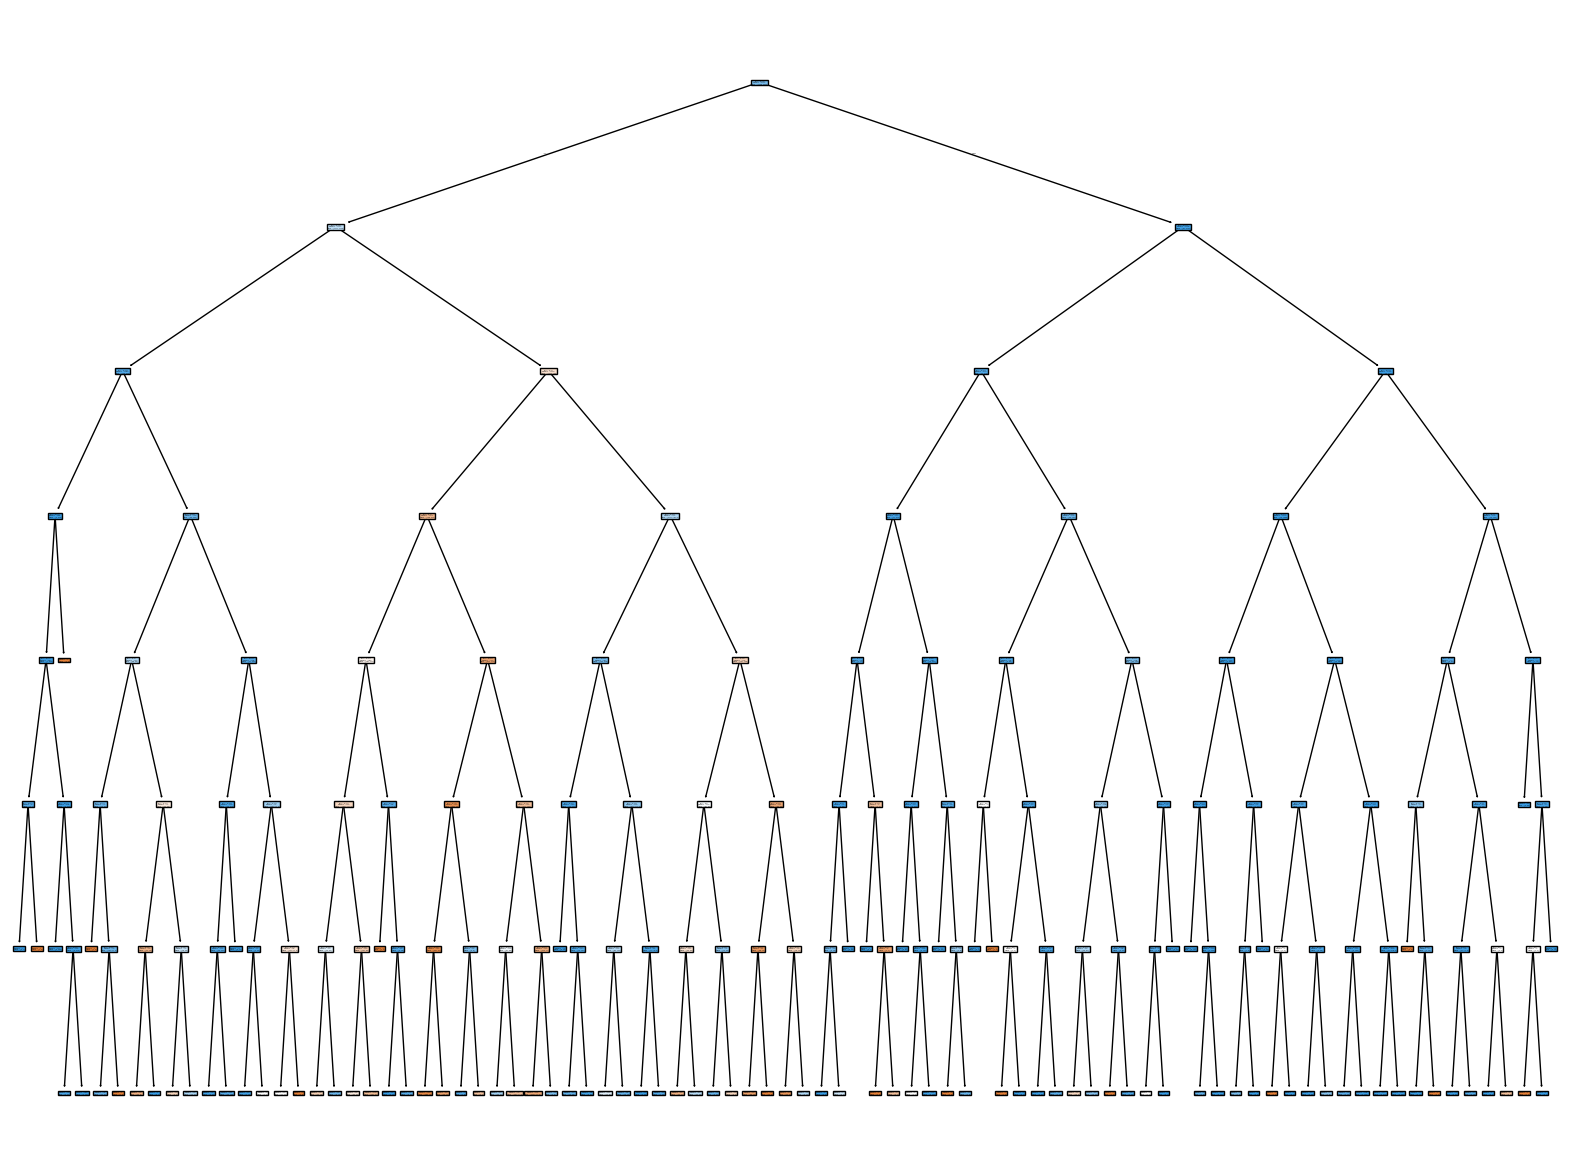

In [86]:
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 기존거
# 0.996921300750433
# 0.8592307692307692

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증

기존 방식:

- 원 데이터에서 훈련 데이터 / 테스트 데이터 분리

교차 검증 방식:

- 원 데이터에서 훈련데이터 / **검증 데이터** /  테스트 데이터 분리

예시:

- 축구대표팀
    - 훈련 트레이닝
    - 국내 프로팀과 하는 평가전 (검증 데이터)
    - **타 국가와 경기하는 평가전** (테스트 데이터)

## 데이터 다시 불러오기

In [136]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

In [137]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

sub_input.shape, val_input.shape, test_input.shape
# 각각 훈련, 검증, 테스트 데이터

((4157, 3), (1040, 3), (1300, 3))

## 베이스라인 모델
- 사실상 기본 모델
- 이걸 계속 을궈먹는다.

In [138]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증
- 축구대표팀(예시) : 국내 여러팀과 더 경기를 해서 최적의 전략을 찾아야 함
  - 1차 검증 => 점수
  - 2차 검증 => 점수
  - 3차 검증 => 점수
  - 위 1~3차 검증 결과의 점수 평균 내서 최종적으로 산출한다.

In [139]:
from sklearn.model_selection import cross_validate

# Cross_Validation은 자체적으로 검증 데이터를 분리 후 계산한다.
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.01030135, 0.00906086, 0.00990748, 0.00941062, 0.00899982]),
 'score_time': array([0.00156736, 0.00150633, 0.00150871, 0.00147629, 0.00147581]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [140]:
np.mean(scores['test_score'])

0.855300214703487

## 하이퍼파라미터 튜닝
- Grid Search VS Random Search

In [149]:
from sklearn.model_selection import GridSearchCV

# 매개변수 지정 시, 딕셔너리 활용
# key값은 각 모델의 공식문서 보고 작성
# max_depth

# 매개변수명을 지정
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003]}

# max_depth 추가
params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003], 'max_depth': [3, 4, 5, 6, 7]
          }

In [150]:
dt = DecisionTreeClassifier(random_state = 42)
gs = GridSearchCV(dt, params, n_jobs = -1) # 작업 시 컴퓨터의 모든 자원(코어)를 모두 쓰겠다는 뜻
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003]})

In [151]:
best_dt = gs.best_estimator_ # 가장 좋은 모델을 선정함
print(best_dt.score(train_input, train_target), '\n',gs.best_params_)

0.8747354242832404 
 {'max_depth': 6, 'min_impurity_decrease': 0.0003}


## Random Search 사용
- 추천코드

In [152]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [157]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(dt, params, n_jobs = -1, n_iter = 30)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e55c3601bd0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e55c36554e0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e55c66ce830>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e55c3602b00>})

In [158]:
print(gs.best_params_)

{'max_depth': 33, 'min_impurity_decrease': 0.00038800413232779906, 'min_samples_leaf': 7, 'min_samples_split': 6}


In [159]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013983,0.005897,0.002242,0.000774,34,0.000601,20,23,"{'max_depth': 34, 'min_impurity_decrease': 0.0...",0.851923,0.870192,0.886429,0.851781,0.854668,0.862999,0.013555,20
1,0.016515,0.004239,0.001908,0.000072,47,0.001094,3,2,"{'max_depth': 47, 'min_impurity_decrease': 0.0...",0.850000,0.870192,0.879692,0.848893,0.849856,0.859727,0.012787,30
2,0.010656,0.003439,0.009281,0.008845,42,0.000931,15,17,"{'max_depth': 42, 'min_impurity_decrease': 0.0...",0.857692,0.869231,0.882579,0.849856,0.866218,0.865115,0.011055,9
3,0.010335,0.002098,0.004155,0.003132,25,0.000645,7,23,"{'max_depth': 25, 'min_impurity_decrease': 0.0...",0.857692,0.870192,0.884504,0.849856,0.852743,0.862998,0.012809,21
4,0.015790,0.007105,0.001848,0.000081,41,0.000274,6,21,"{'max_depth': 41, 'min_impurity_decrease': 0.0...",0.861538,0.863462,0.880654,0.846968,0.866218,0.863768,0.010756,14
5,0.013105,0.005626,0.001898,0.000102,39,0.000214,3,6,"{'max_depth': 39, 'min_impurity_decrease': 0.0...",0.874038,0.862500,0.870067,0.842156,0.861405,0.862033,0.010994,24
6,0.012675,0.003571,0.004605,0.003459,27,0.000463,8,7,"{'max_depth': 27, 'min_impurity_decrease': 0.0...",0.860577,0.870192,0.882579,0.849856,0.870067,0.866654,0.010926,4
7,0.014425,0.003639,0.004625,0.004271,34,0.000480,8,21,"{'max_depth': 34, 'min_impurity_decrease': 0.0...",0.860577,0.870192,0.882579,0.848893,0.870067,0.866462,0.011225,6
8,0.008216,0.001657,0.001666,0.000111,32,0.000809,16,10,"{'max_depth': 32, 'min_impurity_decrease': 0.0...",0.847115,0.870192,0.882579,0.849856,0.865255,0.863000,0.013155,19
9,0.016072,0.004581,0.003131,0.002540,46,0.000191,13,9,"{'max_depth': 46, 'min_impurity_decrease': 0.0...",0.849038,0.859615,0.878730,0.846968,0.865255,0.859921,0.011563,29


## 모형 평가

In [160]:
new_dt = gs.best_estimator_
new_dt.score(test_input, test_target) # 최종 테스트 데이터

0.86

# Pipeline
- 파이프라인

In [191]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/penguin_clf_X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/penguin_clf_X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/penguin_clf_y_train.csv')

In [192]:
X_train.head(1)

,ID,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,28,Biscoe,40.5,17.9,187.0,3200.0,female,2007


In [193]:
X_test.head(1)

,ID,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,31,Dream,39.5,16.7,178.0,3250.0,female,2007


In [194]:
y_train.head(1)

,species
0,Adelie


## 데이터 전처리

- ID 제거

In [195]:
X_train_id = X_train['ID']
X_test_id = X_test['ID']

In [196]:
X_train = X_train.drop(['ID'], axis = 1)
X_test = X_test.drop(['ID'], axis = 1)

- 결측치 체크

In [197]:
X_train.isnull().sum()

,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


- 칼럼 분리
  - 범주형 칼럼명
  - 수치형 칼럼명

In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             233 non-null    object 
 1   bill_length_mm     233 non-null    float64
 2   bill_depth_mm      233 non-null    float64
 3   flipper_length_mm  233 non-null    float64
 4   body_mass_g        233 non-null    float64
 5   sex                233 non-null    object 
 6   year               233 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 12.9+ KB


# 문제 나옴

In [199]:
import numpy as np

cat_cols = X_train.select_dtypes(exclude = np.number).columns.tolist()
num_cols = X_train.select_dtypes(include = np.number).columns.tolist()

In [200]:
num_cols.remove('year')
num_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [201]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train['species'], stratify = y_train['species'], test_size = 0.3, random_state = 42
)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((163, 7), (70, 7), (163,), (70,))

## 파이프라인 모델 생성
- 암기
- 피처 엔지니어링

In [202]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [203]:
# 이 부분이 사실상 파이프라인이다.
# 피처 엔지니어링 - 적절하게 각 피처를 머신러닝 알고지즘에 맞게 가공

column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), num_cols),# num_cols에, scaler는 StandardScaler로 스케일링 하겠다
    ("one_encoder", OneHotEncoder(), cat_cols)
], remainder = "passthrough", force_int_remainder_cols = False)

pipeline = Pipeline([
    ("preprocessing", column_transformer),
    ("clf", RandomForestClassifier(max_depth = 2, random_state = 42))
])

# 훈련데이터 학습 - 이때 당연히 테스트 데이터도 훈련시켜야 한다!
pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('one_encoder',
                                                  OneHotEncoder(),
                                                  ['island', 'sex'])])),
                ('clf', RandomForestClassifier(max_depth=2, random_state=42))])

In [204]:
def get_score(model, X_tr, X_val, y_tr, y_val):
    tr_pred = model.predict(X_tr) # 만약 확률로 구할시, predict_proba()[:, 1]
    # print(tr_pred)
    val_pred = model.predict(X_val)
    tr_score = f1_score(y_tr, tr_pred, average="macro")
    val_score = f1_score(y_val, val_pred, average="macro")
    return f"train: {tr_score}, validation: {val_score}"

get_score(pipeline, X_tr, X_val, y_tr, y_val)

'train: 0.9844163939535608, validation: 1.0'

- 예측

In [205]:
final_preds = pipeline.predict(X_test)
result = pd.DataFrame({
    "ID": X_test_id,
    "preds": final_preds
})

result

,ID,preds
0,31,Adelie
1,321,Chinstrap
2,80,Adelie
3,203,Gentoo
4,64,Adelie
...,...,...
95,21,Adelie
96,8,Adelie
97,217,Gentoo
98,100,Chinstrap
